### Loan Prediction

In [ ]:
# Data cleaning and formatting
# Exploratory data analysis
# Feature engineering and selection
# Compare several machine learning models on a performance metric
# Perform hyperparameter tuning on the best model
# Evaluate the best model on the testing set
# Interpret the model results
# Draw conclusions and document work

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set();

#### Data cleaning and formatting

In [3]:
# Load dataset
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [4]:
# Dimensions of the dataset.
print(df_train.shape)

(614, 13)


In [5]:
# Dimensions of the dataset.
print(df_test.shape)

(367, 12)


In [7]:
# Inspect the Data
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
# Inspect the Data
df_test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [10]:
# Statistical summary of numerical all attributes.
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
# Statistical summary of numerical all attributes.
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [18]:
# Distribution
# number of instances (rows) that belong to each class
print(df_train.groupby('Loan_Status').size())

Loan_Status
N    192
Y    422
dtype: int64


In [17]:
# Train Missing values
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
# replace missing values
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)

In [46]:
df_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Over 80% is NO it will be safe to fill the missing values with NO

In [47]:
df_train['Self_Employed'].fillna('No',inplace=True)

In [48]:
# Missing values
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [35]:
# Test Missing values 
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [38]:
# replace missing values
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0], inplace=True)
df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean(), inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace=True)

In [49]:
df_test['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

Over 80% is NO it will be safe to fill the missing values with NO like we did to the train dataset

In [50]:
df_test['Self_Employed'].fillna('No',inplace=True)

In [51]:
# Test Missing values 
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

No more missing values for df_train and df_test

#### Exploratory data analysis

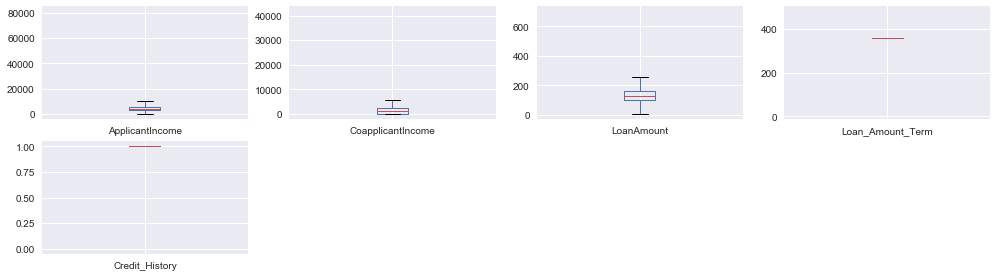

In [54]:
# Box plot of numerica attributes
df_train.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False, figsize=(17,12))
plt.show()

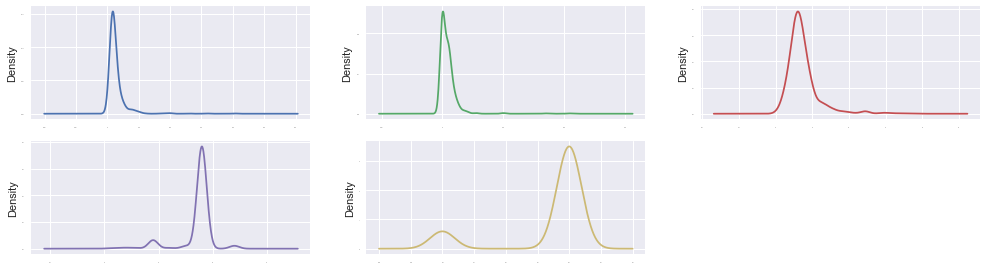

In [55]:
# The same perspective of the data using density plots.
df_train.plot(kind= 'density' , subplots=True, sharex=False, legend=False, fontsize=1,figsize=(17,12),layout=(5,3))
plt.show()

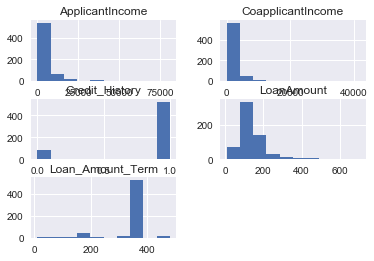

In [53]:
# histograms
df_train.hist()
plt.show()

In [60]:
#corr = df_train.corr()
#print (corr['Loan_Status'].sort_values(ascending=False), '\n')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


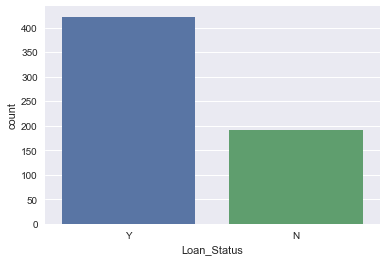

In [58]:
# Target variable: Loan_Status
sns.countplot(x='Loan_Status', data=df_train);

Alot of people got loans, and half of the total people that got loans got denied*

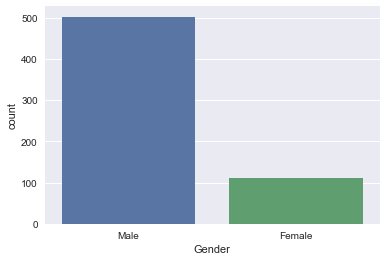

In [65]:
# The Gender attribute
sns.countplot(x='Gender', data=df_train);

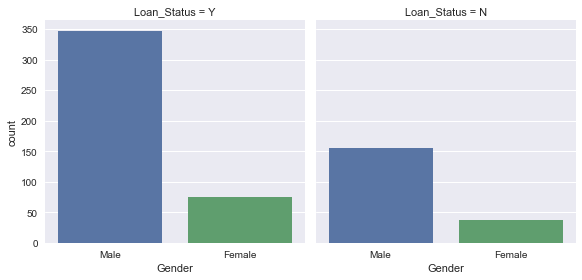

In [70]:
# Comparing the Married and Loan_Status attributes
sns.factorplot(x='Gender', col='Loan_Status', kind='count',data=df_train)

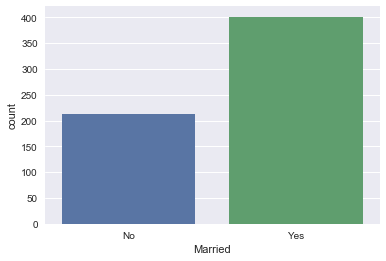

In [68]:
# The Married attribute
ax = plt.subplots()
sns.countplot(x='Married', data=df_train);

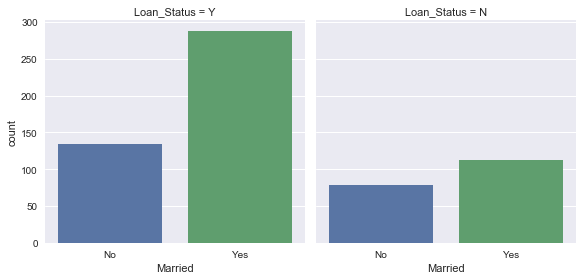

In [69]:
# Comparing the Married and Loan_Status attributes
sns.factorplot(x='Married', col='Loan_Status', kind='count',data=df_train)

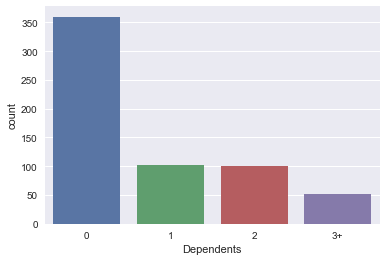

In [72]:
# The Dependents attribute
ax = plt.subplots()
sns.countplot(x='Dependents', data=df_train);

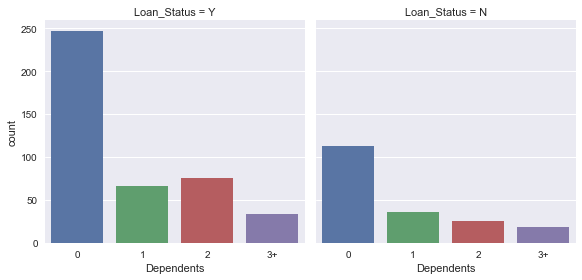

In [73]:
# Comparing the Dependents and Loan_Status attributes
sns.factorplot(x='Dependents', col='Loan_Status', kind='count',data=df_train)

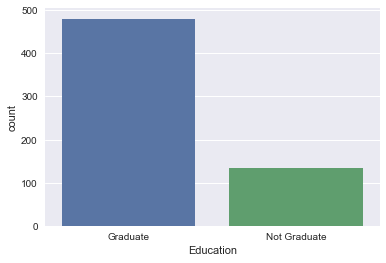

In [75]:
# The Education attribute
ax = plt.subplots()
sns.countplot(x='Education', data=df_train);

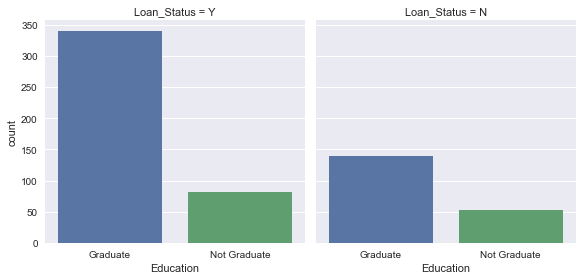

In [76]:
# Comparing the Education and Loan_Status attributes
sns.factorplot(x='Education', col='Loan_Status', kind='count',data=df_train)

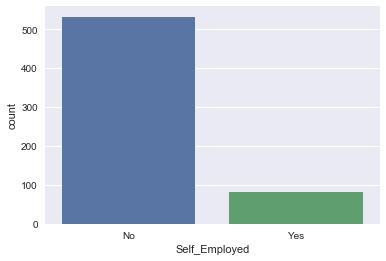

In [77]:
# The Education attribute
ax = plt.subplots()
sns.countplot(x='Self_Employed', data=df_train);

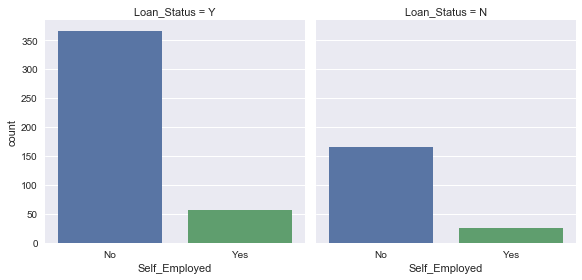

In [78]:
# Comparing the Self_Employed and Loan_Status attributes
sns.factorplot(x='Self_Employed', col='Loan_Status', kind='count',data=df_train)

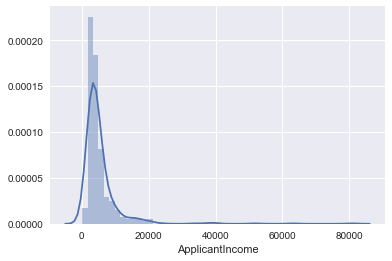

In [80]:
# The ApplicantIncome attribute
ax = plt.subplots()
sns.distplot(df_train.ApplicantIncome, kde=True)

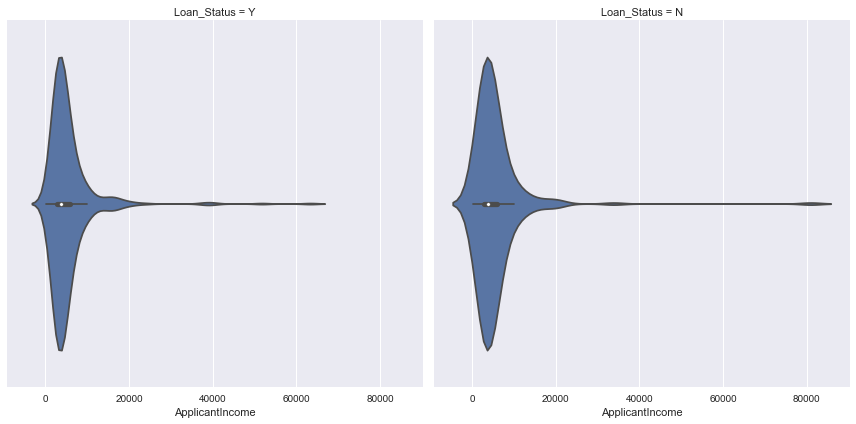

In [82]:
# Comparing the Age and Income attributes
sns.factorplot(x='ApplicantIncome', col='Loan_Status', kind='violin', data=df_train, hue='Loan_Status', size=6);

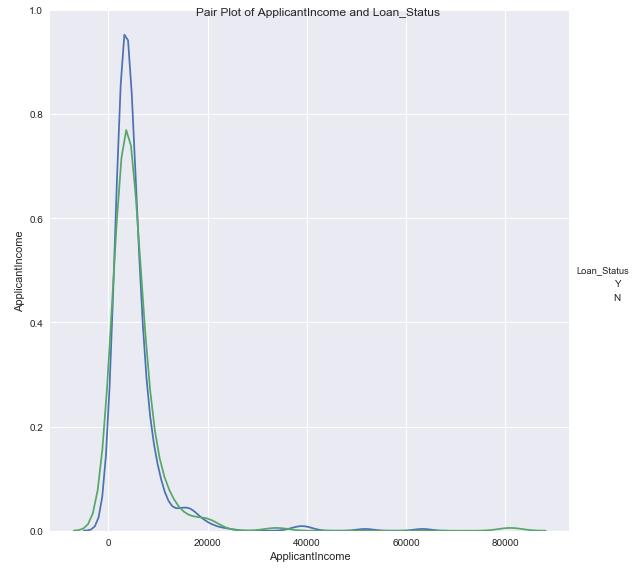

In [90]:
# Plot colored by continent for years 2000-2007
sns.pairplot(df_train, 
             vars = ['ApplicantIncome'], 
             hue = 'Loan_Status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 8);

# Title 
plt.suptitle('Pair Plot of ApplicantIncome and Loan_Status', 
             size = 12);